# Clase Práctica 09

# CNN - Redes Neuronales Convolucionales

# Utilización de modelos pre-entrenados


En la actualidad existen muchas redes neuronales convolucionales que han sido entrenadas con imágenes de la base de datos ImageNet. ImageNet es un proyecto que proporciona una gran base de datos con sus respectivas anotaciones y que ha sido utilizada en una competencia anual llamada "ImageNet Large Scale Visual Recognition Challenge", competencia para clasificar cientos y miles de imágenes de objetos. 

Recordar que durante el entrenamiento de las redes neuronales convolucionales se calculan los pesos óptimos de la red para realizar la clasificación. Estos pesos determinan cuan bien una red puede clasificar los diferentes objetos. Luego de entrenar la red es posible guardar los pesos obtenidos y la arquitectura de la red. Así no es necesario reentrenar la red en el futuro. 

Además, es importante destacar que el entrenamiento de una red es un proceso largo y tedioso, y que requiere grandes recursos computacionales, considerando que se quieren clasificar más de 1000 objetos en la base de datos de ImageNet. Por esta razón, el uso de redes pre-entrenadas ha surgido para reducir el consumo de recursos y para realizar una clasificación con resultados obtenidos en el estado del arte. 

#  Redes pre-entrenadas

Diferentes estructuras de redes neuronales convolucionales pueden ser encontradas en Keras. Por favor revise las arquitecturas en el siguiente enlace: https://keras.io/applications/

Los principales modelos entrenados con ImageNet son: Xception, VGG, ResNet, Inception, MobileNet, etc. 

En esta clase, se utilizarán varias redes pre-entrenadas para mostrar la clasificación de imágenes obtenidas de internet. La idea es mostrar lo fácil que es realizar predicciones de imágenes mediante algunas arquitecturas típicas. 


#  Predicción de una clase específica con InceptionResnetV2

A continuación veremos como realizar la predicción de una imagen utilizando los pesos del modelo InceptionResNetV2 entregado por Keras. 

Para estimular aún más el progreso en Deep Learning, Inception-ResNet-v2, una red neuronal convolucional (CNN) que logra un nuevo estado del arte en términos de precisión en la clasificación de imágenes. Inception-ResNet-v2 es una variación de del modelo Inception V3 que toma prestadas algunas ideas de los papers de ResNet de Microsoft. Los detalles completos del modelo se encuentran en el artículo de Inception-v4, Inception-ResNet y el impacto de las conexiones residuales en el aprendizaje (http://arxiv.org/abs/1512.00567).

Las conexiones residuales permiten accesos directos en el modelo y han permitido a los investigadores entrenar con éxito redes neuronales aún más profundas, lo que ha llevado a un rendimiento aún mejor. Esto también ha permitido una simplificación significativa de los bloques de inicio. Simplemente compare las arquitecturas en las siguientes figuras:


<img src="./images_tutoriales/resnet.png">



Primero se deben cargar las librerías que permiten la utilización del modelo pre-entrenado. Al llamar a la función InceptionResNetV2, ésta se encarga de cargar los pesos obtenidos por el entrenamiento de ImageNet. Si los pesos no están en su computador, Keras se encarga de descargarlos. 

Luego se carga la imagen a predecir. En este caso utilizaremos la imagen 'avestruz.jpg'. Se utiliza la librería de preprocesamiento de Keras para modificar la dimensión de la imagen y realizar un preprocesado de la imagen, de esta forma queda directa para ser utilizada por el modelo de predicción (CNN). 

Utilizando la clase predict() asociado al modelo CNN de Keras es posible obtener la predicción hecha por la red. En nuestro tutorial vamos a mostrar el top 3 (las 3 primeras predicciones con mayor probabilidad). Notar que los nombres de la clasificación están en inglés. 

El código siguiente muestra el proceso de realizar la predicción mediante InceptionResnetV2.

#  Carga de los pesos

In [1]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2                                                     
from keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
from keras.preprocessing import image    
import numpy as np                      

model_RNV2 = InceptionResNetV2(weights='imagenet')     

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


#  Modelo de red neuronal

In [2]:
model_RNV2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

activation_179 (Activation)     (None, 8, 8, 256)    0           batch_normalization_179[0][0]    
__________________________________________________________________________________________________
block8_4_mixed (Concatenate)    (None, 8, 8, 448)    0           activation_176[0][0]             
                                                                 activation_179[0][0]             
__________________________________________________________________________________________________
block8_4_conv (Conv2D)          (None, 8, 8, 2080)   933920      block8_4_mixed[0][0]             
__________________________________________________________________________________________________
block8_4 (Lambda)               (None, 8, 8, 2080)   0           block8_3_ac[0][0]                
                                                                 block8_4_conv[0][0]              
__________________________________________________________________________________________________
block8_4_a

#  Carga de la imagen a predecir

In [3]:
img_path = 'avestruz.jpg'                                                           
img = image.load_img(img_path, target_size=(299, 299))                

x = image.img_to_array(img)                                                      
x = np.expand_dims(x, axis=0)                                                    
x = preprocess_input(x)                                                                              

#  Predicción

In [4]:
preds = model_RNV2.predict(x)                                                         
print('Prediction:', decode_predictions(preds, top=3)[0])  
#  Carga de los pesos

Prediction: [('n01518878', 'ostrich', 0.91942394), ('n02018795', 'bustard', 0.00050353823), ('n04251144', 'snorkel', 0.00042083272)]


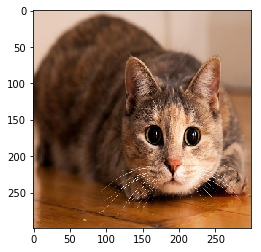

Prediction: [('n02123045', 'tabby', 0.46315807), ('n02124075', 'Egyptian_cat', 0.3297596), ('n02123159', 'tiger_cat', 0.11565708)]


In [23]:
import matplotlib.pyplot as plt

img_path = 'gato.jpg'           # gato.jpg                                                
img = image.load_img(img_path, target_size=(299, 299))                

x = image.img_to_array(img)                                                      
x = np.expand_dims(x, axis=0)                                                    
x = preprocess_input(x) 

plt.imshow(img)
plt.show()

preds = model_RNV2.predict(x)                                                         
print('Prediction:', decode_predictions(preds, top=1)[0])

#  Predicción de una clase específica con otros modelos

Como vimos en el apartado anterior, realizar la predicción con un modelo entrenado es bastante sencillo. 

A continuacion se presenta una serie de ejemplos que permiten realizar la predicción de imagenes mediante diferentes redes pre-entrenadas. Se presentan las siguientes redes pre-entrenadas para realizar la predicción: ResNet50, InceptionV3,  MobileNet y VGG16. 


#  ResNet50


<img src="./images_tutoriales/resnet50_.png">


In [24]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image    
import numpy as np 

model_RN50 = ResNet50(weights='imagenet')



In [25]:
model_RN50.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [26]:
img_path = 'avestruz.jpg'                                                          
img = image.load_img(img_path, target_size=(224, 224))                

x = image.img_to_array(img)                                                      
x = np.expand_dims(x, axis=0)                                                    
x = preprocess_input(x)    

In [27]:
preds = model_RN50.predict(x)                                                         
print('Prediction:', decode_predictions(preds, top=3)[0]) 

Prediction: [('n01518878', 'ostrich', 0.99984145), ('n02018795', 'bustard', 0.00015340268), ('n02437616', 'llama', 1.5159494e-06)]


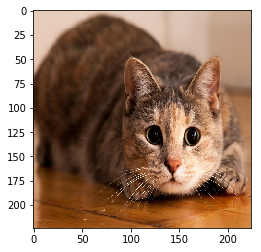

Prediction: [('n02123045', 'tabby', 0.41575047)]


In [28]:
import matplotlib.pyplot as plt

img_path = 'gato.jpg'           # gato.jpg                                                
img = image.load_img(img_path, target_size=(224, 224))                

x = image.img_to_array(img)                                                      
x = np.expand_dims(x, axis=0)                                                    
x = preprocess_input(x) 

plt.imshow(img)
plt.show()

preds = model_RN50.predict(x)                                                         
print('Prediction:', decode_predictions(preds, top=1)[0])

#  InceptionV3

<img src="./images_tutoriales/inceptionv3.png">

In [29]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions

from keras.preprocessing import image    
import numpy as np 

model_InceptionV3 = InceptionV3(weights='imagenet')

In [30]:
model_InceptionV3.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, 149, 149, 32) 96          conv2d_204[0][0]                 
__________________________________________________________________________________________________
activation_253 (Activation)     (None, 149, 149, 32) 0           batch_normalization_204[0][0]    
__________________________________________________________________________________________________
conv2d_205

In [33]:
img_path = 'avestruz.jpg'                                                          
img = image.load_img(img_path, target_size=(299, 299))                

x = image.img_to_array(img)                                                      
x = np.expand_dims(x, axis=0)                                                    
x = preprocess_input(x)    

In [34]:
preds = model_InceptionV3.predict(x)                                                         
print('Prediction:', decode_predictions(preds, top=3)[0]) 

Prediction: [('n01518878', 'ostrich', 0.96253204), ('n02018795', 'bustard', 0.0010824968), ('n02437312', 'Arabian_camel', 0.00039613748)]


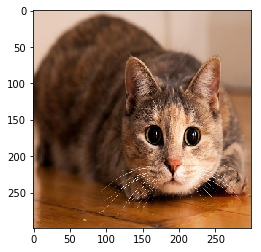

Prediction: [('n02123045', 'tabby', 0.5399189)]


In [36]:
import matplotlib.pyplot as plt

img_path = 'gato.jpg'           # gato.jpg                                                
img = image.load_img(img_path, target_size=(299, 299))                

x = image.img_to_array(img)                                                      
x = np.expand_dims(x, axis=0)                                                    
x = preprocess_input(x) 

plt.imshow(img)
plt.show()

preds = model_InceptionV3.predict(x)                                                         
print('Prediction:', decode_predictions(preds, top=1)[0])

#  MobileNet


<img src="./images_tutoriales/mobilenet.png">

https://arxiv.org/pdf/1704.04861.pdf


In [37]:
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input, decode_predictions

from keras.preprocessing import image    
import numpy as np 

model_MobileNet = MobileNet(weights='imagenet')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [38]:
model_MobileNet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [39]:
img_path = 'avestruz.jpg'                                                          
img = image.load_img(img_path, target_size=(224, 224))                

x = image.img_to_array(img)                                                      
x = np.expand_dims(x, axis=0)                                                    
x = preprocess_input(x)  

In [40]:
preds = model_MobileNet.predict(x)                                                         
print('Prediction:', decode_predictions(preds, top=3)[0]) 

Prediction: [('n01518878', 'ostrich', 0.9999666), ('n02018795', 'bustard', 2.7746652e-05), ('n02437616', 'llama', 9.068445e-07)]


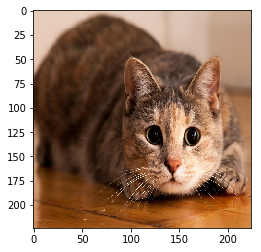

Prediction: [('n02124075', 'Egyptian_cat', 0.4686683)]


In [41]:
import matplotlib.pyplot as plt

img_path = 'gato.jpg'           # gato.jpg                                                
img = image.load_img(img_path, target_size=(224, 224))                

x = image.img_to_array(img)                                                      
x = np.expand_dims(x, axis=0)                                                    
x = preprocess_input(x) 

plt.imshow(img)
plt.show()

preds = model_MobileNet.predict(x)                                                         
print('Prediction:', decode_predictions(preds, top=1)[0])

#  VGG - 16

<img src="./images_tutoriales/vgg.png">

In [43]:
from keras.applications.vgg16 import VGG16
from keras.applications.mobilenet import preprocess_input, decode_predictions

from keras.preprocessing import image    
import numpy as np 

model_VGG = VGG16(weights='imagenet')

In [44]:
model_VGG.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [45]:
img_path = 'avestruz.jpg'                                                          
img = image.load_img(img_path, target_size=(224, 224))                

x = image.img_to_array(img)                                                      
x = np.expand_dims(x, axis=0)                                                    
x = preprocess_input(x)  

In [46]:
preds = model_VGG.predict(x)                                                         
print('Prediction:', decode_predictions(preds, top=3)[0]) 

Prediction: [('n03788365', 'mosquito_net', 0.12120663), ('n01498041', 'stingray', 0.03708045), ('n15075141', 'toilet_tissue', 0.034763142)]


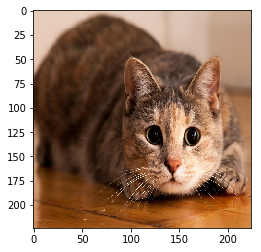

Prediction: [('n03788365', 'mosquito_net', 0.066469036)]


In [50]:
import matplotlib.pyplot as plt

img_path = 'gato.jpg'           # gato.jpg                                                
img = image.load_img(img_path, target_size=(224, 224))                

x = image.img_to_array(img)                                                      
x = np.expand_dims(x, axis=0)                                                    
x = preprocess_input(x) 

plt.imshow(img)
plt.show()

preds = model_VGG.predict(x)                                                         
print('Prediction:', decode_predictions(preds, top=1)[0])